## Attrition:- ***company losing its customer base***

**Attrition is a process in which the workforce dwindles at a company, following a period in which a number of people retire or resign, and are not replaced.**
- A reduction in staff due to attrition is often called a hiring freeze and is seen as a less disruptive way to trim the workforce and reduce payroll than layoffs
- In this NoteBook our Aim will be to analyze the datasets completely wrt each and feature and find the reasin behind Attrition of Employees.
- And what the top factors which lead to employee attrition?

### Description about the data
Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'


### *Additinal Description Which will help to understand the features*

**Hourly Rate:**  An hourly employee is paid a wage for each hour worked, unlike a salaried employee.

**EmployeeNumber:** An Employee Number is a unique number that has been assigned to each current and former State employee and elected official in the Position and Personnel DataBase (PPDB).

**JobLevel:** Job levels, also known as job grades and classifications, set the responsibility level and expectations of roles at your organization. They may be further defined by impact, seniority, knowledge, skills, or job title, and are often associated with a pay band. The way you structure your job levels should be dictated by the needs of your unique organization and teams.

**StockOptionLevel:** Employee stock options, also known as ESOs, are stock options in the company’s stock granted by an employer to certain employees. Typically they are granted to those in management or officer-level positions.
Stock options give the employee the right to buy a certain amount of stock at a specific price, during a specific period of time. Options typically have expiration dates as well, by which the options must have been exercised, otherwise they will become worthless.

In [1]:
#load libraries
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.filterwarnings("ignore")

In [2]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data = pd.read_csv('/Users/sarthakchawla/Downloads/employee_attrition_previous_closure.csv')
#copy the data to another df
empdf = data.copy()

In [5]:
#look over shape of data
empdf.shape

(1029, 35)

In [6]:
#look at sample of data
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [7]:
#let's see what data types how many features we are having
empdf.dtypes.value_counts()

int64      23
object      9
float64     3
dtype: int64

In [8]:
empdf['Attrition'].value_counts()

No     853
Yes    176
Name: Attrition, dtype: int64

In [9]:
#fig = go.Figure(figsize=(4,5))
#trace = go.Pie(labels=empdf['Attrition'], values=empdf['Attrition'].value_counts())
#iplot([trace])

In [10]:
# pie chart for attrition
fig = go.Figure()
fig.add_trace(go.Pie(labels=empdf['Attrition'], values=empdf['Attrition'].value_counts()))
fig.update_layout(autosize=False, width=400, height=350)
fig.show()

In [11]:
# let's see the total Missing values in dataset
empdf.isnull().sum().sum()

268

**Observations**
* we only have int and string data types features. there is no feature with float. 26 features are numerical and 9 features are categorical
* Attrition in out target value which has no missing value. But, the quantity of data of emp having Attrition is less compared to employees whoch do not have Attrition. 
- It's very good that we are having a complete dataset, there is no any missing values in dataset.

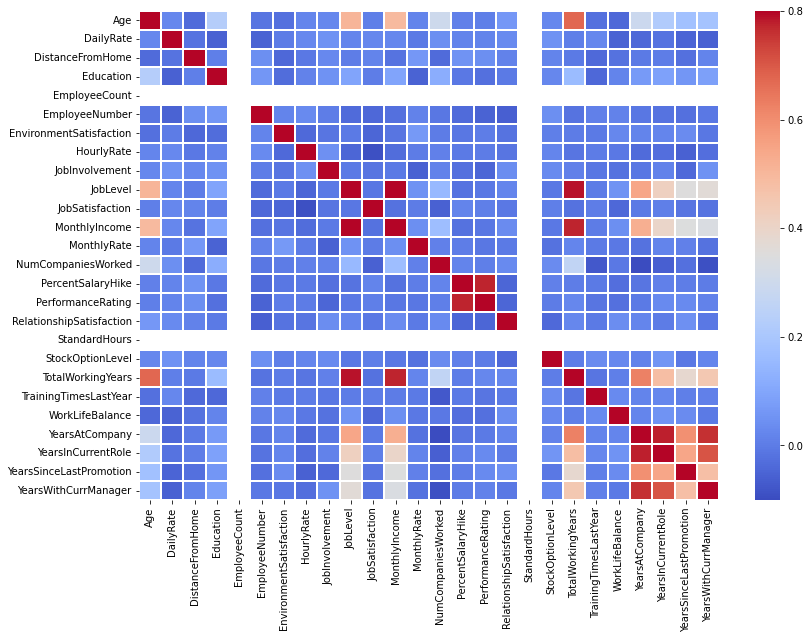

In [12]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

* JobLevel seems to be important feature, we will see that in further analysis.
* TotalWorkingYears have positive relationship with JobLevel, and MonthlyIncome.
* little bit of positive relationship can be seen between YearsAtCompany with YearsInCurrentRole, and YearsWithCurrentManager.

# EDA

### Univariate and Bivariate Analysis
**Categorical Features**

In [13]:
categorical_features = empdf.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 9


In [14]:
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Rarely,Research & Development,Medical,Male,Research Director,Divorced,Y,No
1,No,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Divorced,Y,No
2,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Single,Y,No
3,No,Travel_Frequently,Human Resources,Medical,Male,Manager,Married,Y,No
4,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Y,No


In [15]:
# Business Travel
empdf['BusinessTravel'].value_counts()

Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64

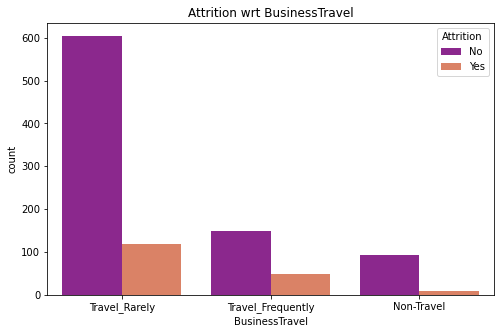

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=empdf, palette='plasma')
plt.title("Attrition wrt BusinessTravel")
plt.show()

In [17]:
# using plotly express.
fig = px.histogram(empdf, x='BusinessTravel', color='Attrition', barmode="group",
            width=650,height=390)
fig.show()

In [18]:
#Department
empdf['Department'].value_counts()

Research & Development    676
Sales                     311
Human Resources            42
Name: Department, dtype: int64

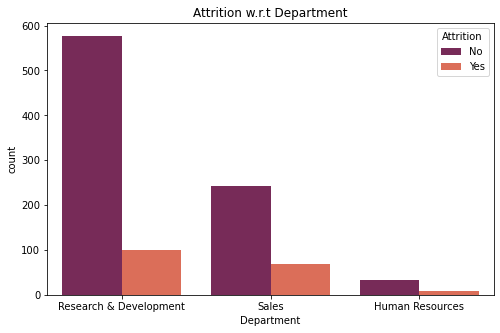

In [19]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition', data=empdf, palette='rocket')
plt.title("Attrition w.r.t Department")
plt.show()

In [20]:
#EducationField
empdf['EducationField'].value_counts()

Life Sciences       426
Medical             328
Marketing           110
Technical Degree     82
Other                66
Human Resources      17
Name: EducationField, dtype: int64

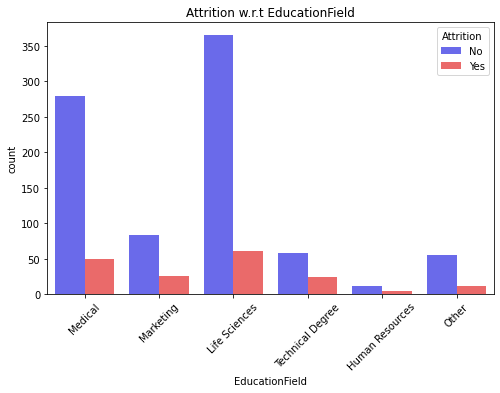

In [21]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField',hue='Attrition', data=empdf, palette='seismic')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

In [22]:
#Gender
empdf['Gender'].value_counts()

Male      617
Female    412
Name: Gender, dtype: int64

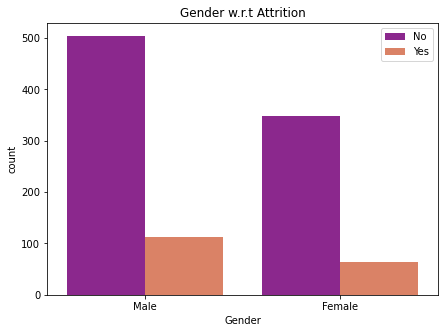

In [23]:
# most male of female employes Attriate
# Department wrt Attrition
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',hue='Attrition', data=empdf, palette='plasma')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [24]:
# let's also see, how any male and female are Married
pd.crosstab(empdf['MaritalStatus'],empdf['Gender'])

Gender,Female,Male
MaritalStatus,,
Divorced,79,151
Married,196,278
Single,134,186


In [25]:
#JobRole
empdf['JobRole'].nunique()

9

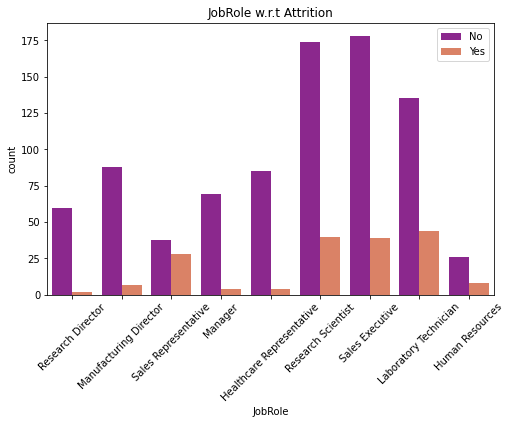

In [26]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole',hue='Attrition', data=empdf, palette='plasma')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [27]:
#OverTime
empdf['OverTime'].value_counts()

No     731
Yes    298
Name: OverTime, dtype: int64

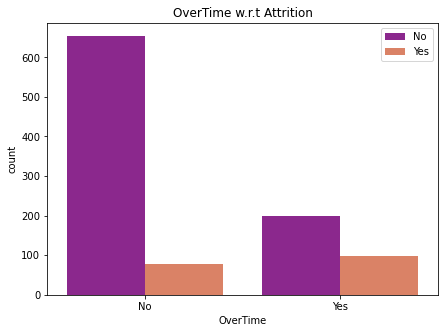

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime',hue='Attrition', data=empdf, palette='plasma')
plt.title("OverTime w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [29]:
# how many male and female do overTime
pd.crosstab(empdf['OverTime'], empdf['Gender'])

Gender,Female,Male
OverTime,,
No,286,445
Yes,126,172


**OBSERVATIONS**
- The employees are more who travel very rare, and the number of Attition of such employees are more. It is also one reason which creates one hypothesis in mind, that should emp got less chance to outing and thus they are not comfortable with job.
- Employees working in R&D department are more, but employees from sales department or at position like sales executive,sale Representative leaves the job early.
- Males are more under Attrition then Females
- Male workers are more who do overtime.

**Numerical Features**

In [30]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O']
print("Total numerical_features", len(numerical_features))

Total numerical_features 26


In [31]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,1126.0,1.0,2,1,997,4,66,3,4,4,17399,6615,9,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,216.0,6.0,2,1,178,2,84,3,2,2,4941,2819,6,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,337.0,7.0,1,1,1780,2,31,3,1,2,2679,4567,1,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,1246.0,NaN,3,1,644,1,99,3,5,2,18200,7999,1,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,994.0,7.0,4,1,1118,2,87,3,3,2,10445,15322,7,19,3,4,80,0,18,4,3,8,6,4,0


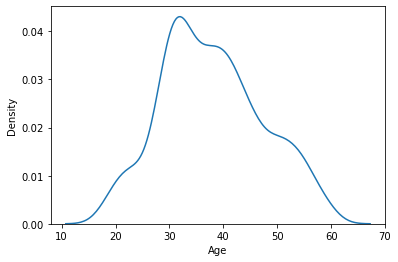

In [32]:
# distribution of age
sns.distplot(empdf['Age'],hist=False)
plt.show()

In [33]:
empdf['Age'].nunique()

39

* Age column is very well normalized, most of employees are age between 25 to 40.
- we are having some of the numerical columns which are lebel encoded for us, they are ordinal labels, so let's have a look at them first

In [34]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
empdf[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,4,3,4,4,3,2
1,2,2,3,2,4,4,3
2,1,2,3,2,3,2,3
3,3,1,3,2,3,3,3
4,4,2,3,2,3,4,3


In [35]:
# Education
empdf['Education'].value_counts()

3    386
4    279
2    194
1    134
5     36
Name: Education, dtype: int64

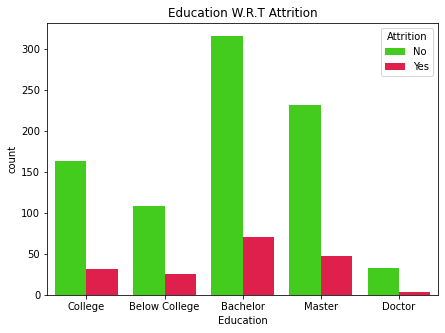

In [36]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(7,5))
sns.countplot(x=empdf['Education'].map(edu_map), hue='Attrition', data=empdf, palette='prism')
plt.title("Education W.R.T Attrition")
plt.show()

In [37]:
#EnvironmentSatisfaction
empdf['EnvironmentSatisfaction'].value_counts()   # it is very nice response from employees

3    310
4    300
2    212
1    207
Name: EnvironmentSatisfaction, dtype: int64

In [38]:
#JobInvolvement
empdf['JobInvolvement'].value_counts()

3    606
2    269
4     94
1     60
Name: JobInvolvement, dtype: int64

**OBSERVATIONS**
- Employees from Bachelor are more, then from Masters background. Attrition wrt to bachelor can be seem more because they have more and more expectation from companies and it will be interesting to see the reason behind this in this dataset.
- EnvironmentSatisfaction can be rank as high or medium. means very less employees do not like the work environment which cannot be seem as great cause for changing a job.
- JobInvolvement of employees is very much high.

**Analysis of exact numerical features except ordinal labels which are pre-encoded**

In [39]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O' and feature not in ordinal_features]
print("total numerical_features",len(numerical_features))

total numerical_features 19


In [40]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,1126.0,1.0,1,997,66,4,17399,6615,9,22,80,1,32,1,5,4,1,3
1,36.0,216.0,6.0,1,178,84,2,4941,2819,6,20,80,2,7,0,3,2,0,1
2,21.0,337.0,7.0,1,1780,31,1,2679,4567,1,13,80,0,1,3,1,0,1,0
3,50.0,1246.0,NaN,1,644,99,5,18200,7999,1,11,80,1,32,2,32,5,10,7
4,52.0,994.0,7.0,1,1118,87,3,10445,15322,7,19,80,0,18,4,8,6,4,0


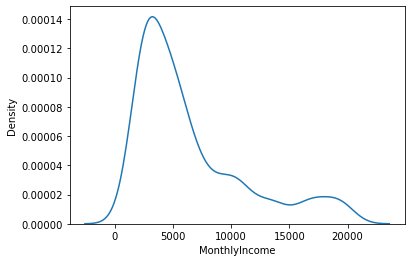

In [41]:
#MonthlyIncome
sns.distplot(empdf['MonthlyIncome'],hist=False)
plt.show()

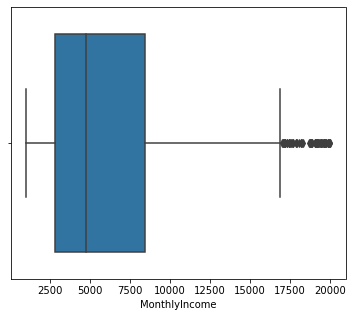

In [42]:
plt.figure(figsize=(6,5))
sns.boxplot(empdf['MonthlyIncome'])
plt.show()

In [43]:
# MonthlyIncome with respect to Age of Employee

#sns.lineplot(x='Age',y='MonthlyIncome', data=empdf)
trace = go.Scatter(x=empdf['Age'],y=empdf['MonthlyIncome'], mode="markers+lines",
                   marker=dict(size=12), line=dict(shape='spline'))
data=[trace]

layout = {"title":"Monthly Income Variation wrt Age",
           "xaxis":{"title":"Age"},
           "yaxis":{"title":"MonthlyIncome"}
         }

iplot({"data":data, "layout":layout})

**The graph is to much overlapper but it increases quadratic and It is clear that Income Increases with respect to Age and Experience**

In [44]:
# employee count in age group and whicg age employees are more
empdf.groupby('Age')['EmployeeCount'].sum().sort_values(ascending=False).head()

Age
29.0    49
36.0    48
34.0    48
31.0    47
32.0    42
Name: EmployeeCount, dtype: int64

In [45]:
#JobLevel
empdf['JobLevel'].value_counts()

1    403
2    350
3    151
4     78
5     47
Name: JobLevel, dtype: int64

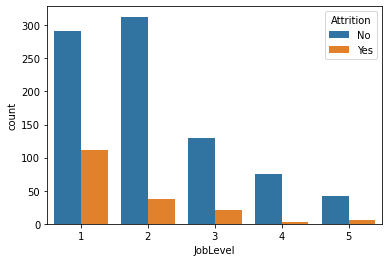

In [46]:
# JobLevel can have some effect on Attrition of Employees
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

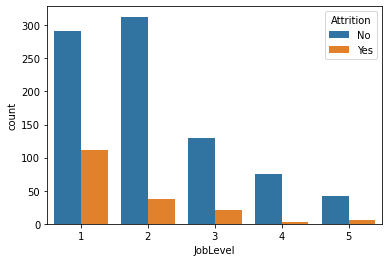

In [47]:
#NumCompaniesWorked
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

In [48]:
empdf['StockOptionLevel'].value_counts()

0    432
1    417
2    111
3     69
Name: StockOptionLevel, dtype: int64

In [49]:
#drop the columns which have save val in whole dataset or which are unrelevant for Attrition prediction. 
empdf.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1, inplace=True)

## Categorical Encoding

In [50]:
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Rarely,Research & Development,Medical,Male,Research Director,Divorced,Y,No
1,No,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Divorced,Y,No
2,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Single,Y,No
3,No,Travel_Frequently,Human Resources,Medical,Male,Manager,Married,Y,No
4,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Y,No


In [51]:
# Target Variable(Attrition)
empdf['Attrition'] = empdf['Attrition'].replace({'No':0,'Yes':1})

In [52]:
#encode binary variables
empdf['OverTime'] = empdf['OverTime'].map({'No':0,'Yes':1})
empdf['Gender'] = empdf['Gender'].map({'Male':0,'Female':1})

In [53]:
#encode categorical columns which are ordinal, use labelEncoding
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(empdf[col].value_counts().index,0)}
    empdf[col] = empdf[col].map(map_dict)

In [54]:
# drop the Over18 column
empdf.drop('Over18',axis=1,inplace=True)

### Making a Corelation

In [55]:
empdf.corr()['Attrition'][:-1].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.273295
EducationField              0.092899
Department                  0.079797
DistanceFromHome            0.065264
NumCompaniesWorked          0.061832
MonthlyRate                 0.002960
MaritalStatus              -0.000983
HourlyRate                 -0.007533
PercentSalaryHike          -0.011157
BusinessTravel             -0.016686
PerformanceRating          -0.021510
Education                  -0.022094
JobRole                    -0.030180
DailyRate                  -0.034119
RelationshipSatisfaction   -0.036987
Gender                     -0.039339
YearsSinceLastPromotion    -0.050700
TrainingTimesLastYear      -0.051681
WorkLifeBalance            -0.054439
EnvironmentSatisfaction    -0.082964
JobSatisfaction            -0.102101
JobInvolvement             -0.129238
YearsAtCompany             -0.154422
StockOptionLevel           -0.158530
MonthlyIncome              -0.171551
Age                        -0.175555
J

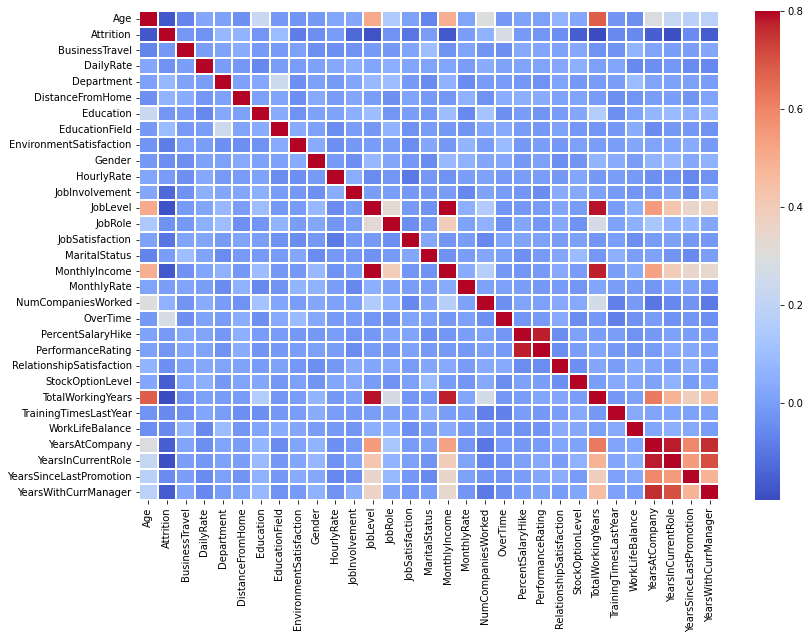

In [56]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [57]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,0.0,1126.0,0,1.0,2,1,4,0,66,3,4,7,4,2.0,17399,6615,9,0,22,4,3,1,32,1,2,5,4,1,3
1,36.0,0,0.0,216.0,0,6.0,2,1,2,0,84,3,2,3,2,2.0,4941,2819,6,0,20,4,4,2,7,0,3,3,2,0,1
2,21.0,1,0.0,337.0,1,7.0,1,2,2,0,31,3,1,6,2,1.0,2679,4567,1,0,13,3,2,0,1,3,3,1,0,1,0
3,50.0,0,1.0,1246.0,2,NaN,3,1,1,0,99,3,5,5,2,0.0,18200,7999,1,0,11,3,3,1,32,2,3,32,5,10,7
4,52.0,0,0.0,994.0,0,7.0,4,0,2,0,87,3,3,4,2,1.0,10445,15322,7,0,19,3,4,0,18,4,3,8,6,4,0


## FeatureSelection

In [62]:
df1 = empdf.dropna()

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
#plotting a feature importance
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

**OBSERVATIONS:** ****Factors Responsible for Employee Attrition****

- OverTime has highest relationship with Attrition, Employee who do OverTime, changes or leaves the Job early. we have seen this above also during categorical variable analysis.
- Age is 2nd factor responsible, it can be that who are senior, are retiring or the employees who are bachelor has more expectations more organization.
- MonthlyIncome is also a greatest factor for employee to Attritate
- StockOptionLevel, we have seen can be determing factor, because employees are in chance that they should be given priority and power and consider to have involvement to buy Company stocks.
- EnvironmentSatisfaction, JobSatisfaction, DistanceFromHome, WorkLifeBalance, JobLevel is at same level affects equally to the organization employees base.

### Feature Selection with Feature Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

In [63]:
ExtraTree = ExtraTreesClassifier()

ExtraTree.fit(x_scaled, y)

feature_importance = pd.Series(ExtraTree.feature_importances_, index=x.columns)
feature_importance

Age                         0.045035
BusinessTravel              0.024545
DailyRate                   0.031447
Department                  0.022705
DistanceFromHome            0.037340
Education                   0.029658
EducationField              0.032038
EnvironmentSatisfaction     0.039297
Gender                      0.019164
HourlyRate                  0.031421
JobInvolvement              0.032804
JobLevel                    0.035260
JobRole                     0.033627
JobSatisfaction             0.035273
MaritalStatus               0.028395
MonthlyIncome               0.041826
MonthlyRate                 0.030495
NumCompaniesWorked          0.034467
OverTime                    0.067992
PercentSalaryHike           0.030453
PerformanceRating           0.013190
RelationshipSatisfaction    0.030291
StockOptionLevel            0.037217
TotalWorkingYears           0.038297
TrainingTimesLastYear       0.030171
WorkLifeBalance             0.035088
YearsAtCompany              0.035136
Y

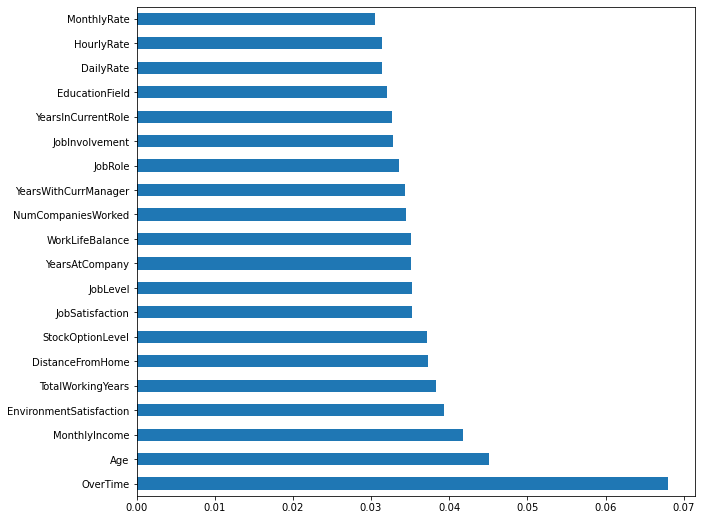

In [64]:
plt.figure(figsize=(10,9))
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

- Only a little bit of changed occured due to scaling the features that, can be proved strong from modelling part.

## Modelling

In [63]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

In [64]:
#split data into train and test set.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape)
print("testing shape: ",x_test.shape)

training shape:  (771, 30)
testing shape:  (258, 30)


In [65]:
#models
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [67]:
# first check the accuracy score on without scalled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [69]:
# let's try out VotingClassifier
from sklearn.ensemble import VotingClassifier

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf)])

voting_clf.fit(x_train,y_train)

y_pred = voting_clf.predict(x_test)
print("acuracy: ",accuracy_score(y_test,y_pred))

acuracy:  0.8695652173913043


In [70]:
# if we do same thing on scaled features
#split data into train and test set using scaled data.
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("training shape: ",x_train_scaled.shape)
print("testing shape: ",x_test_scaled.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [71]:
# Now check the accuracy score on scalled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train_scaled, y_train_scaled)
    
    pred = clf.predict(x_test_scaled)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.904891304347826
SVC   0.8831521739130435
KNeighborsClassifier   0.875
DecisionTreeClassifier   0.8097826086956522
RandomForestClassifier   0.875


In [72]:
# try votingClf with scaled data

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf)])

voting_clf.fit(x_train_scaled,y_train_scaled)

y_pred = voting_clf.predict(x_test_scaled)
print("acuracy: ",accuracy_score(y_test_scaled,y_pred))

acuracy:  0.8940217391304348


**This is reason why Feature Scaling is used. by scaling down the features we are able to achieve better accuracy**

**ADABOOST:** Adaboost is a boosting algoritm, which works on concept of errror correction using the concept of SAMME(Stagwise Adaptive Multimodelling using Multiclass exponential loss function) algorithm. It works sequentially by building a sequential model that works on a error generated by previous model. Repeatedly it do this process untill iterations are over of error becomes 0. Thus, it exploits the dependency between the models and different from Bagging(RandomForest).

**XGBoost:** Xgboost is an extension to GBM, for better speed and performance. It is trained in additive manner. It prevents the overfitting, and outliers. for xgboost we also no need to impute missing values, it takes care of that too.  

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [74]:
boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME',learning_rate=0.01)

boost.fit(x_train_scaled,y_train_scaled)

predictions = boost.predict(x_test_scaled)

print("accuracy:",accuracy_score(y_test,predictions))

accuracy: 0.8722826086956522


In [75]:
#training accuracy
print("training accuracy:",boost.score(x_train_scaled,y_train_scaled))
print("testing accuracy:",boost.score(x_test_scaled,y_test_scaled))

training accuracy: 0.837568058076225
testing accuracy: 0.8722826086956522


In [76]:
# XGBOOST
xgb = XGBClassifier()

xgb.fit(x_train_scaled, y_train_scaled)

prediction = xgb.predict(x_test_scaled)

print("accuracy: ",accuracy_score(y_test,prediction))

accuracy:  0.8804347826086957


## Hyperparameter(Performance) Tuning

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [78]:
# let's first try hyperparameter tuning with RandomForest

#number of trees in forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
#max depth of tree
max_depth = [int(x) for x in np.linspace(5,30,6)]
#quality of split
criterion = ['gini','entropy']
#min no. of samples to consider for splitting a internal node
min_samples_split = [2,5,7,10]
#min number of node can be as leaf node
min_samples_leaf = [2,5,8]
# The number of features to consider when looking for the best split:
max_features = ["auto","sqrt"]

random_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                   max_features=max_features)
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [2, 5, 8], 'max_features': ['auto', 'sqrt']}


In [79]:
rf_clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf_clf, param_distributions=random_grid, cv=5, n_iter=10,
                               random_state=42, n_jobs=-1,verbose=1,)

rf_random.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=1)

In [80]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.855697243932538
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [81]:
# hyperparameter tuning for XgBoost

n_estimators = [int(x) for x in np.linspace(100,1000,10)]

max_depth = [int(x) for x in np.linspace(6,30,5)]
learning_rate = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
min_child_weight = list(range(1,10))

xg_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
               min_child_weight=min_child_weight)
print(xg_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [6, 12, 18, 24, 30], 'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [82]:
xgb = XGBClassifier()
xgb_random = RandomizedSearchCV(xgb, param_distributions=xg_grid, cv=5, random_state=42,
                               n_iter=10,scoring="accuracy",n_jobs=-1,verbose=1)

xgb_random.fit(x_train_scaled,y_train_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.9s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [83]:
print("score: ",xgb_random.best_score_)
print("best_params: \n",xgb_random.best_params_)

score:  0.8629452900041136
best_params: 
 {'n_estimators': 600, 'min_child_weight': 7, 'max_depth': 24, 'learning_rate': 0.004}


### **If you like this Notebook, Please Upvote. It gives motivation for making a new notebooks and positively move ahead with a Data science journey**

**Thank You!..** 